# 1-Setup


## 1.1 Install Dependencies

In [24]:
!pip install opencv-python 

## 1.2 Import Dependencies

In [25]:
# import standard dependencies
import cv2         # to work with open cv 
import os          # to work with files on drive
import random
import numpy as np
import matplotlib.pyplot as plt     # for visualising the data

In [26]:
# import tensorflow dependencies
import tensorflow as tf    
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten        # Dense are fully connected layers,  Flatten laayer flatten the data to smaller dimensions

## 1.3 Set GPU Growth

In [27]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.4 Create Folder Structure

In [28]:
# setup paths
POS_PATH = os.path.join('data', 'positive')     # positive verification images
NEG_PATH = os.path.join('data', 'negative')     # negative verification images
ANC_PATH = os.path.join('data', 'anchor')

In [29]:
POS_PATH

'data\\positive'

In [ ]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# 2. Collect Positives and Anchors

## 2.1 Untar Labelled Faces in the Wild Dataset

In [ ]:
# https://vis-www.cs.umass.edu/lfw/         # link of the dataset
# not opening now 

In [ ]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

## i have downloaded and extracted the dataset from Kaggle to the device itself
# and moved to the folder negative all the face folders or items

In [ ]:
# # Move LFW Images to the following repository data/negative
# for directory in os.listdir('lfw'):
#     for file in os.listdir(os.path.join('lfw', directory)):
#         EX_PATH = os.path.join('lfw', directory, file)
#         NEW_PATH = os.path.join(NEG_PATH, file)
#         os.replace(EX_PATH, NEW_PATH)

# # done this itself moving all the folers containing image to the negative folder

In [22]:
## doing this after moving the all the directories to the lfw named folder
# for the first time only not always

for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [ ]:
## after moving all the negative images to the NEGATIVE folder
# for the first time only not always

for file in os.listdir(NEG_PATH):          # joining the path and printing the file 
    # print(file)                                                    # for getting the all the file names inside a folder of files 
    print(os.path.join(NEG_PATH,  file))                # for getting the full path joining the old paths together

## 2.2 Collect Positive and Anchor Classes

In [30]:
# Import uuid library to generate unique image names
import uuid         # universally unique identifier

In [ ]:
uuid??         # ?? at the end 2 times to get all the details of the command or library

In [32]:
uuid.uuid1()

UUID('d45a1187-e4c5-11ef-baa5-c01850ae9962')

In [33]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\d4b42556-e4c5-11ef-81b0-c01850ae9962.jpg'

In [ ]:
## This code is for opening our camera and capturing the image
# for the first time only not always


# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():     # loop through every single frame in the webcam
    ret, frame = cap.read()    # unpack values 

    # cut down frame to 250 x 250 pixels
    frame = frame[170:170+250,200:200+250,:]

    # collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):    # wait 1 millisecond  and 'a' will close the frame
        # creating unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))     # givng unique name to the image
        # Write out anchor image
        cv2.imwrite(imgname, frame)                      # saving the image with name with cv2 object's library

    # collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):    # wait 1 millisecond  and 'p' will close the frame
        # creating unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))     # givng unique name to the image
        # Write out anchor image
        cv2.imwrite(imgname, frame)                      # saving the image with name with cv2 object's library
 
    
    # this we get from the below by twerking or trialing the frames

    # show image back to screen
    cv2.imshow('Image Collection', frame)

    # Breaking gracefully on pressing 'q' key
    if cv2.waitKey(1) & 0XFF == ord('q'):    # wait 1 millisecond  and 'q' will close the frame
        break

# Release the webcam
cap.release()

# Close the image show frame
cv2.destroyAllWindows()

In [ ]:
# plt.imshow(frame)      # to view the image

In [ ]:
frame.shape
# all the images in our foler is 250x250
# indexing to get the 250x250 shape

In [ ]:
# frame[:250,:250,:].shape       # array slicing

In [ ]:
# plt.imshow(frame[:250,:250,:])       # getting only top left corner

In [ ]:
# twerking or hitting and trialing to get the better shape of the image
# plt.imshow(frame[170:170+250,200:200+250,:])

# putting this frame size back to the code where we open tha camera for better capture

## 2.3 Data Augmentation

In [17]:
# for the first time only not always

def data_aug(img):
    data = []
    # everything is applied randomly......
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))      # applied randomly
        img = tf.image.stateless_random_contrast(img, lower=0.06, upper=1, seed=(1,3))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100), np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100), np.random.randint(100)))
        # improve or degrade the image Quality
        img = tf.image.stateless_random_saturation(img, lower=0.9, upper=1, seed=(np.random.randint(100), np.random.randint(100)))

        data.append(img)

    return data

In [2]:
import os

In [20]:
img_path = os.path.join(ANC_PATH, '5f7cc491-e0c8-11ef-a50b-9c2f9d645586.jpg')
img = cv2.imread(img_path)
augmented_images = data_aug(img)

for image in augmented_images:
    cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [21]:
# for the first time only not always
# adding augmented images to the positive folder (only for 1 time)

for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img)

    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH,'{}.jpg'.format(uuid.uuid1())), image.numpy())

In [22]:
# for the first time only not always
# adding augmented images to the anchor folder (only for 1 time)

for file_name in os.listdir(os.path.join(ANC_PATH)):
    img_path = os.path.join(ANC_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img)

    for image in augmented_images:
        cv2.imwrite(os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1())), image.numpy())

# 3. Load and Preprocess Images

## 3.1 Get Image Directories

In [34]:
anchor = tf.data.Dataset.list_files(ANC_PATH+r'\*.jpg').take(3000)       # r is used to escape \ sequence
positive = tf.data.Dataset.list_files(POS_PATH+r'\*.jpg').take(3000)     # we only have jpg images
negative = tf.data.Dataset.list_files(NEG_PATH+r'\*.jpg').take(3000)

In [35]:
dir_test = anchor.as_numpy_iterator()

In [36]:
print(dir_test.next())      # you can continuosly iterate next element

b'data\\anchor\\fc239ec1-e4c3-11ef-814c-c01850ae9962.jpg'


## 3.2 Preprocessing - Scale and Resize

In [37]:
# this will convert the iamge to preprocessed image as a numpy eqvivalent image in the form of arrays

def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)      # reading the image from the file path of the function provioded path
    
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)         # decoding the image to array form

    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))

    # Scale image to be between 0 and 1
    img = img/255.0

    # Return image
    return img
    

In [38]:
img = preprocess('data\\anchor\\a30702d4-e0c8-11ef-963b-9c2f9d645586.jpg')     # preprocessing a sample image

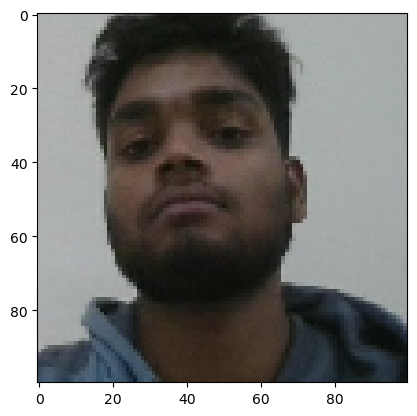

In [39]:
plt.imshow(img)      # showing the preprocessed image 

## 3.3 Create Labelled Dataset

In [40]:
tf.ones_like([1,1,1,4.565,2.555,2])    # give ones like the similar shape

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1.], dtype=float32)>

In [41]:
# anchor, positive =>  1,1,1,1,1
# anchor, negative =>  0,0,0,0,0

In [42]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(3000,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

In [43]:
tf.ones(len(anchor))

<tf.Tensor: shape=(3000,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [44]:
tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))     # it is creating or putting the data into the dataloader

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>

In [45]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))       # this is creating a labelled positives
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))      # this is creating a lebelled negative
data = positives.concatenate(negatives)       # joining the positives and negatives together

In [46]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [47]:
samples = data.as_numpy_iterator()

In [48]:
samples.next()

(b'data\\anchor\\c37cf8a2-e4c3-11ef-8a2b-c01850ae9962.jpg',
 b'data\\positive\\9408d208-e4c3-11ef-bfd5-c01850ae9962.jpg',
 1.0)

In [49]:
example = samples.next()       # its not shuffled right now

## 3.4 Build Train and Test Partition

In [50]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [51]:
res = preprocess_twin(*example)       # passing the example values by unpacking in the function....

In [52]:
len(res)

3

In [53]:
res[0]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.50490195, 0.5362745 , 0.49313724],
        [0.5019608 , 0.53333336, 0.49019608],
        [0.49803922, 0.5294118 , 0.4862745 ],
        ...,
        [0.50784314, 0.5352941 , 0.50392157],
        [0.4995098 , 0.5269608 , 0.49558824],
        [0.4990196 , 0.5264706 , 0.49509802]],

       [[0.50490195, 0.5362745 , 0.49313724],
        [0.5019608 , 0.53333336, 0.49019608],
        [0.49803922, 0.5294118 , 0.4862745 ],
        ...,
        [0.50808823, 0.5355392 , 0.50416666],
        [0.50661767, 0.53406864, 0.5026961 ],
        [0.50686276, 0.53431374, 0.5029412 ]],

       [[0.50490195, 0.5362745 , 0.49313724],
        [0.5019608 , 0.53333336, 0.49019608],
        [0.49803922, 0.5294118 , 0.4862745 ],
        ...,
        [0.50980395, 0.54019606, 0.5       ],
        [0.50980395, 0.54019606, 0.5       ],
        [0.50686276, 0.5372549 , 0.4970588 ]],

       ...,

       [[0.31862745, 0.36568627, 0.31862745],
        [0.31

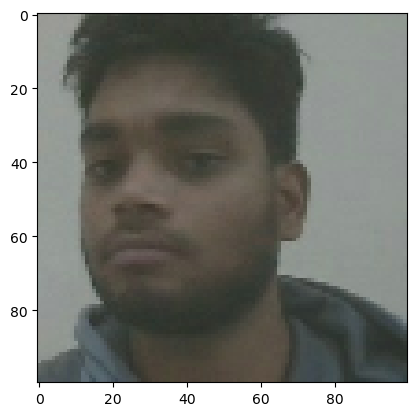

In [54]:
plt.imshow(res[1])

In [55]:
# Build dataloader pipeline
data = data.map(preprocess_twin)             # applying the preprocess_twin function on every element of the data 
data = data.cache()                          # caching our images
data = data.shuffle(buffer_size = 10000)      # shuffle the images

In [56]:
samples = data.as_numpy_iterator()

In [57]:
new_example = samples.next()

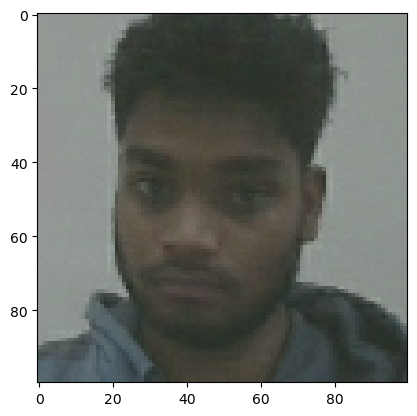

In [58]:
plt.imshow(new_example[0])

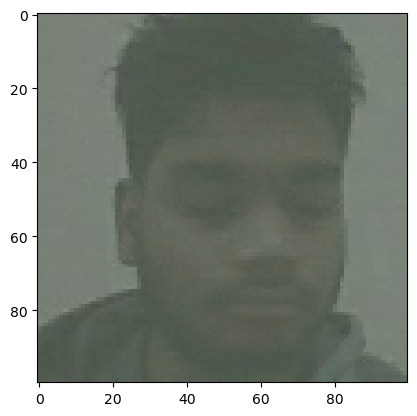

In [59]:
plt.imshow(new_example[1])

In [60]:
new_example[2]     # label is 0 as the images are not same or of negative class

1.0

In [61]:
# Training partition
train_data = data.take(round(len(data)*0.7))     # (take)  grabbing a certain percenatage of your data into training set 70% here
train_data = train_data.batch(16)                # group elements in batches of 16
train_data = train_data.prefetch(8)             # prefetching 8 images for preprocessing to remove bottleneck or to remove idle time

In [62]:
train_samples = train_data.as_numpy_iterator()

In [63]:
train_sample = train_samples.next()

In [64]:
len(train_sample[0])

16

In [65]:
# Testing Partition (or validation partition)

test_data = data.skip(round(len(data)*0.7))               # skipped first 70% of the data
test_data = test_data.take(round(len(data)*0.3))          # took last 30% of the data
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [66]:
len(test_data)        # 12 because 12 * 16 ~ 180 last batch will have only 4 images (training was 720 images)

113

# 4. Model Engineering

## 4.1 Build Embedding Layer

In [67]:
def make_embedding():
    inp = Input(shape=(100,100,3), name='input_image')        # input layers shape

    # First Block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)          # siamese network 1st layer not same but similar , convolutional layer
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)          # maxpooling layer    padding same maintain similar output

    # Second Block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    # Third Block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    # Final Embedding Block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)         # Final Convolution layer
    f1 = Flatten()(c4)                                     # Flattening the output of the convolution by 'nh*nw*nc'
    d1 = Dense(4096, activation='sigmoid')(f1)             # Dense layer with 4096 dense output units
    
    return Model(inputs = [inp], outputs=[d1], name='embedding')      # output is final layer input is inp

In [68]:
embedding = make_embedding()

In [69]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2 Build Distance Layer

In [70]:
# L1 distance layer for calculating the distances between anchor positive or anchor negative
# Siamese L1 distance class
class L1Dist(Layer):

    # init method -- inheritance
    def __init___(self, **kwargs):            
        super().__init__()
        
    # Magic happens here -- similarity calculation
    def call(self, input_embedding, validation_embedding):  
        input_embedding = tf.convert_to_tensor(input_embedding)
        validation_embedding = tf.convert_to_tensor(validation_embedding)
        return tf.math.abs(input_embedding - validation_embedding)           # calculating L1 distances 

In [71]:
l1 = L1Dist()

## 4.3 Make Siamese Model

In [72]:
input_image = Input(name='input_img', shape=(100,100,3)) 
validation_image = Input(name='validation_img', shape=(100,100,3))

In [73]:
inp_embedding = embedding(input_image)       # passing through the model
val_embedding = embedding(validation_image)

In [74]:
inp_embedding

[<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_9>]

In [75]:
val_embedding

[<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_10>]

In [76]:
siamese_layer = L1Dist()

In [77]:
distances = siamese_layer(inp_embedding, val_embedding)

In [78]:
classifier = Dense(1, activation='sigmoid')(distances)

In [79]:
classifier

<KerasTensor shape=(1, None, 1), dtype=float32, sparse=False, name=keras_tensor_12>

In [80]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [81]:
siamese_network.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_1 (L1Dist)  │ (1, None, 4096)   │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (1, None, 1)      │      4,097 │ l1_dist_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
def make_siamese_model():

    # Handle inputs
    # Anchor image input in the nwtwork
    input_image = Input(name='input_img', shape=(100,100,3))     

    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(100,100,3))

    # Combine siamese distance components
    siamese_layer = L1Dist()            # creating object of the siamese L1 Distance class
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))      # passing input image to out embedding model

    # Classification Layer
    classifier = Dense(1, activation='sigmoid')(distances)    # bases on siamese paper

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')     # returning all this together

In [83]:
siamese_model = make_siamese_model()

In [84]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_2 (L1Dist)  │ (1, None, 4096)   │          0 │ embedding[2][0],  │
│                     │                   │            │ embedding[3][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (1, None, 1)      │      4,097 │ l1_dist_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# 5. Training

## 5.1 Setup Loss and Optimizer

In [85]:
binary_cross_entropy = tf.losses.BinaryCrossentropy()       # loss

In [86]:
opt = tf.keras.optimizers.Adam(1e-4)          # learning rate is 0.0001

## 5.2 Establish Checkpoints

In [89]:
# make a directory names training_checkpointsv2 in the folder
checkpoint_dir = './training_checkpointsv2'               # defining checkpoint directory, where w'll save all the checkpoints, save the new directory yourself by the same name
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')     # define checkpoint prefix , it will start with prefix 'ckpt' 

checkpoint = tf.train.Checkpoint(opt=opt, siamese_model = siamese_model)    # saving the model and optimizers as well in the checkpoint....

## To reload the checkpoint you can use model.add('path to checkpoint')    This will loas the pre-trained weights into the existing model.

## 5.3 Build Train Step Function

In [90]:
test_batch = train_data.as_numpy_iterator()

In [91]:
batch1 = test_batch.next()

In [92]:
X = batch1[:2]

In [93]:
np.array(X).shape

(2, 16, 100, 100, 3)

In [94]:
y = batch1[2]

In [95]:
y

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

In [110]:
## This model will be same as in different models as well

@tf.function           # we are compiling what is going to happend under this trainnig function....
def train_step(batch):

    # Record all of our operations here
    with tf.GradientTape() as tape:      # it is recoding everything that is happening inside our neural network 

        # Get anchor and positive/negative image
        X = batch[:2]
        # Get Label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(X, training=True)       # getting output after training the model

        # Reshape yhat to match y_true
        yhat = tf.squeeze(yhat)  # Remove extra dimensions
        
        # Calculate loss
        loss = binary_cross_entropy(y, yhat)         # binary_cross_entropy is an object of the tf.losses.BinaryCrossentropy() which is our loss function
    
    #print(loss)
    # calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)     # using the tape that has recorded all the operations of the neural network
                                                                    # calculating all of the gradients for all of the training variables inside our neurakl network
    # calculate updates weights and apply siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))    # zipping all of the gradients and applying to trainable variables

    ## These two lines are doing:--- they are calculating the gradients for all the weight and applying gradient descenet(adam optimizers) and optimize the
    ## weight to the little bit in order to get closer to the optimized weights

    # return the loss
    return loss,yhat

## 5.4 Build Training Loop

In [111]:
# import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [112]:
def train(data, EPOCHS):
    # lOOP through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))         # defining progress bar

        # Creating a metric Object
        r = Recall()
        p = Precision()

        # lopp through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss,yhat = train_step(batch)
            #yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat)
            # train_step(batch)        # applying training step function to every batch
            progbar.update(idx+1)    # updating the progress bar
        print(loss.numpy(), r.result().numpy(), p.result().numpy())

        # save checkpoints after every 10 epochs
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)      # saving with checkpoint prefix
            


## 5.5 Train the Model

In [113]:
EPOCH = 50

In [114]:
train(train_data, EPOCH)


 Epoch 1/50
262/263 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

C:\Users\mohda\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_image']
Received: inputs=Tensor(shape=(8, 100, 100, 3))
  warnings.warn(msg)


263/263 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step
0.2047161 0.96238834 0.9941719

 Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 597s 2s/step
0.013457985 0.97855103 0.9951527

 Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 592s 2s/step
0.01758225 0.9761108 0.99271137

 Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 578s 2s/step
0.0092758015 0.98775315 0.99857146

 Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 20197s 77s/step
0.028483117 0.9845485 0.9893256

 Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step
0.038533114 0.9579792 0.9916911

 Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 585s 2s/step
0.03414956 0.9853566 0.9976088

 Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 580s 2s/step
1.1190901e-05 0.99711955 0.99951875

 Epoch 9/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 578s 2s/step
8.855116e-05 0.9995136 1.0

 Epoch 10/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 576s 2s/step
0.00020305022 0.9995247 1.0

 Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 586s 2s/step
0.643165 0.9933962 0.98595506

 Epoch 12/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 578s 2s/step


# 6. Evaluate the Model

## 6.1 Import Metrics

In [115]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [116]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()        # we are using varibles for each of the values

In [117]:
test_var = test_data.as_numpy_iterator().next()

In [118]:
test_input

array([[[[0.6237745 , 0.6276961 , 0.60808825],
         [0.62352943, 0.627451  , 0.6068627 ],
         [0.62352943, 0.627451  , 0.6039216 ],
         ...,
         [0.57254905, 0.60784316, 0.5882353 ],
         [0.57254905, 0.60784316, 0.5882353 ],
         [0.5764706 , 0.6117647 , 0.5921569 ]],

        [[0.6242647 , 0.6272059 , 0.6105392 ],
         [0.6242647 , 0.6281863 , 0.60857844],
         [0.62352943, 0.627451  , 0.60563725],
         ...,
         [0.5803922 , 0.6039216 , 0.5882353 ],
         [0.58112746, 0.6046569 , 0.5889706 ],
         [0.5833333 , 0.6068627 , 0.59117645]],

        [[0.627451  , 0.627451  , 0.61960787],
         [0.62352943, 0.6252451 , 0.6122549 ],
         [0.62058824, 0.6245098 , 0.60490197],
         ...,
         [0.5803922 , 0.6039216 , 0.5882353 ],
         [0.58431375, 0.60784316, 0.5921569 ],
         [0.577451  , 0.6009804 , 0.5852941 ]],

        ...,

        [[0.24656862, 0.27598038, 0.3004902 ],
         [0.25710785, 0.28651962, 0.3110294 ]

In [119]:
test_val

array([[[[0.03210784, 0.00465686, 0.00563726],
         [0.04558824, 0.01544118, 0.01764706],
         [0.02279412, 0.00294118, 0.00318627],
         ...,
         [0.00980392, 0.01176471, 0.00441176],
         [0.05539216, 0.04264706, 0.0382353 ],
         [0.01176471, 0.        , 0.        ]],

        [[0.00098039, 0.01151961, 0.00147059],
         [0.01323529, 0.02230392, 0.01102941],
         [0.00441176, 0.01936275, 0.00661765],
         ...,
         [0.01348039, 0.01862745, 0.00490196],
         [0.01102941, 0.00294118, 0.00098039],
         [0.00980392, 0.        , 0.        ]],

        [[0.        , 0.03308824, 0.        ],
         [0.        , 0.0375    , 0.        ],
         [0.3272059 , 0.42303923, 0.36911765],
         ...,
         [0.00882353, 0.02377451, 0.00661765],
         [0.01495098, 0.01568628, 0.00882353],
         [0.00392157, 0.        , 0.        ]],

        ...,

        [[0.        , 0.00759804, 0.        ],
         [0.        , 0.00539216, 0.01078431]

In [120]:
y_true

array([0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
      dtype=float32)

In [121]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step


array([[[4.33882678e-06],
        [1.25220555e-04],
        [9.99998748e-01],
        [9.99999404e-01],
        [2.33794435e-06],
        [9.99999404e-01],
        [1.76212052e-04],
        [2.17868437e-04],
        [5.15616499e-04],
        [3.90512840e-04],
        [1.00468635e-04],
        [9.89954233e-01],
        [5.09182064e-06],
        [9.99999106e-01],
        [9.99991000e-01],
        [9.99736607e-01]]], dtype=float32)

In [122]:
print(y_hat)          # Print the array
print(y_hat.shape)    # Print the shape of the array
print(type(y_hat))    # Print the type of the object
y_hat = y_hat.reshape(-1)

[[[4.33882678e-06]
  [1.25220555e-04]
  [9.99998748e-01]
  [9.99999404e-01]
  [2.33794435e-06]
  [9.99999404e-01]
  [1.76212052e-04]
  [2.17868437e-04]
  [5.15616499e-04]
  [3.90512840e-04]
  [1.00468635e-04]
  [9.89954233e-01]
  [5.09182064e-06]
  [9.99999106e-01]
  [9.99991000e-01]
  [9.99736607e-01]]]
(1, 16, 1)
<class 'numpy.ndarray'>


In [123]:
# Post prepocessing the results
yhat = [1 if prediction>0.5 else 0 for prediction in y_hat]       # list comprehension

In [68]:
# Another way or full form of list_comprehension...
res = []
for prediction in yhat:
    if prediction > 0.5:
        res.append(1)
    else:
        res.append(0)

In [124]:
y_true

array([0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
      dtype=float32)

In [125]:
yhat

[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]

## 6.3 Calculate Metrics

In [126]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return result
m.result().numpy()

1.0

In [127]:
# Creating a metric object
m = Precision()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return result
m.result().numpy()

1.0

In [128]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true, yhat)

print(r.result().numpy(), p.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

C:\Users\mohda\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_image']
Received: inputs=Tensor(shape=(None, 100, 100, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
1.0 1.0


## 6.4 Visualize Results

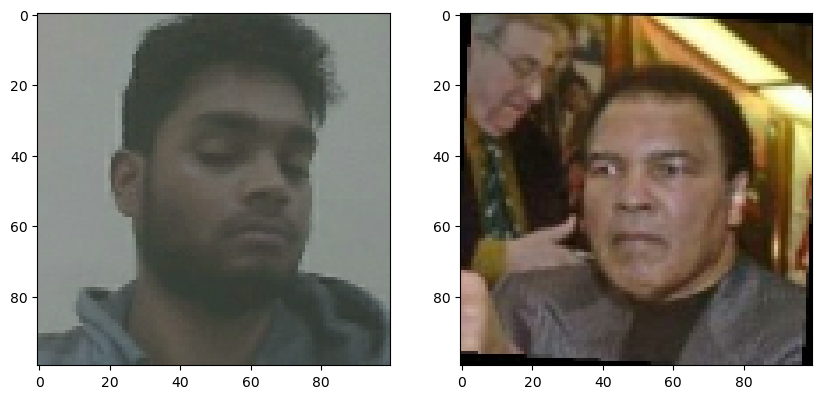

In [129]:
# Set Plot Size
plt.figure(figsize=(10,8))      # x height and y axis of the image

# set First Subplot             # it allows you to render a plots using a grid like format
plt.subplot(1,2,1)            # no of rows , no of columns(no of images horizinatally), index(1 means 1st image)
plt.imshow(test_input[3])

# Set Second Subplot
plt.subplot(1,2,2)
plt.imshow(test_val[3])

# Renders cleanly
plt.show()

# 7. Save Model

In [142]:
# save weights
siamese_model.save('siamesemodelv2.h5')          # saving the model in h5 file in the directory currently working with

In [131]:
# Reload model
import tensorflow as tf
model = tf.keras.models.load_model('siamesemodelv2.h5',        # loads the model saved via 'model.save()'
                                  custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})    # this line L1Dist layer which we have created earlier
                                                                # we have to pass L1Dist layer as custom object otherwise will give the error

In [132]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


array([[[6.6026325e-05],
        [8.1888473e-05],
        [3.9862139e-06],
        [9.5906136e-05],
        [1.0000000e+00],
        [1.3836147e-03],
        [8.9400154e-01],
        [4.7076092e-04]]], dtype=float32)

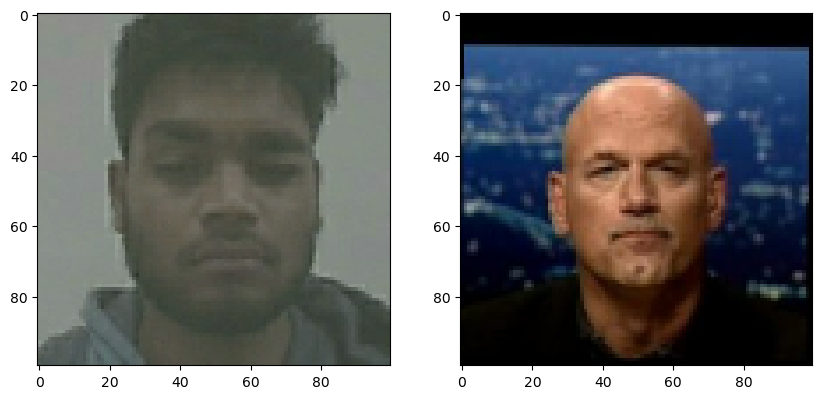

In [134]:
# Set Plot Size
plt.figure(figsize=(10,8))      # x height and y axis of the image

# set First Subplot             # it allows you to render a plots using a grid like format
plt.subplot(1,2,1)            # no of rows , no of columns(no of images horizinatally), index(1 means 1st image)
plt.imshow(test_input[7])

# Set Second Subplot
plt.subplot(1,2,2)
plt.imshow(test_val[7])

# Renders cleanly
plt.show()

In [135]:
# View Model Summary
model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_2 (L1Dist)  │ (1, None, 4096)   │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (1, None, 1)      │      4,097 │ l1_dist_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# 8. Real Time Testing 

## 8.1 verification Function

In [136]:
# list of all the images in the verification_images folder
os.listdir(os.path.join('application_data', 'verification_images'))

['15e58707-e4b4-11ef-894b-9c2f9d645586.jpg',
 '16084d17-e4b4-11ef-ad54-9c2f9d645586.jpg',
 '163a67a0-e4b4-11ef-9eda-9c2f9d645586.jpg',
 '165de8a2-e4b4-11ef-a3ca-9c2f9d645586.jpg',
 '16b3bcb5-e4b4-11ef-80c2-9c2f9d645586.jpg',
 '16ece6e4-e4b4-11ef-ad57-9c2f9d645586.jpg',
 '1710745c-e4b4-11ef-9024-9c2f9d645586.jpg',
 '176d7a89-e4b4-11ef-b6e4-9c2f9d645586.jpg',
 '17a34ca5-e4b4-11ef-8426-9c2f9d645586.jpg',
 '17fce767-e4b4-11ef-a7d5-9c2f9d645586.jpg',
 '182bcc88-e4b4-11ef-aba2-9c2f9d645586.jpg',
 '18861e04-e4b4-11ef-85a2-9c2f9d645586.jpg',
 '19189991-e4b4-11ef-a490-9c2f9d645586.jpg',
 '19412702-e4b4-11ef-bb37-9c2f9d645586.jpg',
 '19694e04-e4b4-11ef-acd8-9c2f9d645586.jpg',
 '19bfd7f3-e4b4-11ef-8869-9c2f9d645586.jpg',
 '19ea56bf-e4b4-11ef-9564-9c2f9d645586.jpg',
 '1a0dbdd7-e4b4-11ef-9161-9c2f9d645586.jpg',
 '1a2df0e9-e4b4-11ef-84fe-9c2f9d645586.jpg',
 '1a55fdc8-e4b4-11ef-9e85-9c2f9d645586.jpg',
 '1a7e7cc2-e4b4-11ef-998c-9c2f9d645586.jpg',
 '1aa08e38-e4b4-11ef-8711-9c2f9d645586.jpg',
 '1b204065

In [137]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [138]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
    print(validation_img)

tf.Tensor(
[[[0.87352943 0.9166667  0.8931373 ]
  [0.8504902  0.89362746 0.8622549 ]
  [0.8257353  0.8688725  0.8375    ]
  ...
  [0.81078434 0.8539216  0.8715686 ]
  [0.81740195 0.8605392  0.8840686 ]
  [0.8352941  0.8745098  0.9098039 ]]

 [[0.87352943 0.9166667  0.8931373 ]
  [0.85294116 0.8960784  0.87107843]
  [0.8303922  0.87352943 0.84411764]
  ...
  [0.83235294 0.8754902  0.89460784]
  [0.8453431  0.889951   0.91495097]
  [0.8519608  0.90294117 0.9343137 ]]

 [[0.877451   0.92058825 0.89705884]
  [0.85294116 0.8960784  0.872549  ]
  [0.8303922  0.87352943 0.85      ]
  ...
  [0.85343134 0.8980392  0.92156863]
  [0.86740196 0.91789216 0.94289213]
  [0.8813726  0.93235296 0.9637255 ]]

 ...

 [[0.25490198 0.34117648 0.39607844]
  [0.25784314 0.34411764 0.3990196 ]
  [0.2615196  0.34117648 0.39828432]
  ...
  [0.33112746 0.44313726 0.5276961 ]
  [0.3125     0.43333334 0.514951  ]
  [0.28357843 0.40514705 0.4865196 ]]

 [[0.26911765 0.35833332 0.4132353 ]
  [0.26887256 0.35808823 0

In [139]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):         # looping through every single image in verification_image directory
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))  # file path for input image which is empty riaghtnow 
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))

        # Make predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis = 1)))          # predicting from the model
        results.append(result)

    
    # Detection Threshold:-- Metric above which a prediction is considered positive
    detection = np.sum(np.array(results) > detection_threshold)      # how many of out prediction results are surpassing this detection_threshold

    # Verification Threshold:-- Proportion of positive predictions / total positive samples
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))   # divide the detection which are above threshold to number of examples 
    verified = verification > verification_threshold
    
    return results, verified

## 8.2 OpenCV Real Time verification

In [100]:
## For taking the verification images for which the model is predicting the image

cap = cv2.VideoCapture(0)         # making object of a video capturing device
while cap.isOpened():
    ret, frame = cap.read()
    
    # cut down frame to 250 x 250 pixels
    frame = frame[170:170+250,200:200+250,:]        # this is standard image slicing we're slicing down the image to 250x250 pixels

    cv2.imshow('Verification_Save', frame)             # name of the camera module whih is opened in front 

    # Verification trigger with key 'v'
    if cv2.waitKey(10) & 0xFF == ord('s'):
        
        # save input image to application_data/input_image folder
        cv2.imwrite(os.path.join('application_data', 'verification_images', '{}.jpg'.format(uuid.uuid1())), frame)        # folder + file name 
        
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [140]:
cap = cv2.VideoCapture(0)         # making object of a video capturing device
while cap.isOpened():
    ret, frame = cap.read()
    
    # cut down frame to 250 x 250 pixels
    frame = frame[170:170+250,200:200+250,:]        # this is standard image slicing we're slicing down the image to 250x250 pixels

    cv2.imshow('Verification', frame)       # name of the camera module whih is opened in front 

    # Verification trigger with key 'v'
    if cv2.waitKey(10) & 0xFF == ord('v'):
        
        # save input image to application_data/input_image folder
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)        # folder + file name 
        
        # Run Verification
        results, verified = verify(model, 0.3, 0.3)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

In [141]:
np.sum(np.squeeze(results) > .49918)

85